***Scene Classifier***

c:\Users\Public\anaconda3\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.6 when it was built against 1.14.5, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


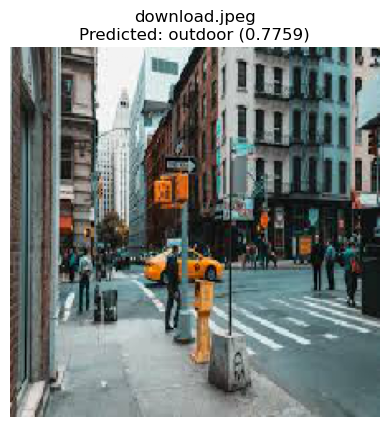

Image: download.jpeg, Predicted: outdoor (0.7759)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


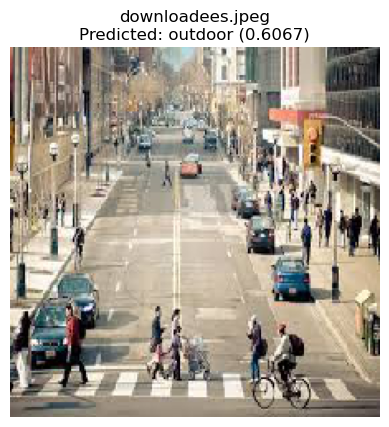

Image: downloadees.jpeg, Predicted: outdoor (0.6067)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


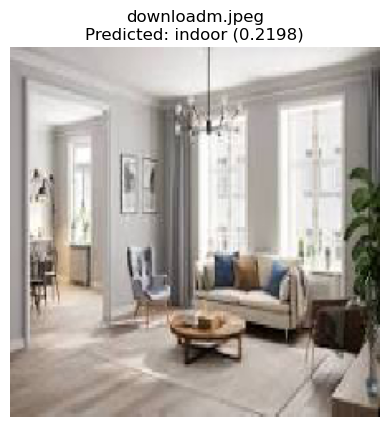

Image: downloadm.jpeg, Predicted: indoor (0.2198)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


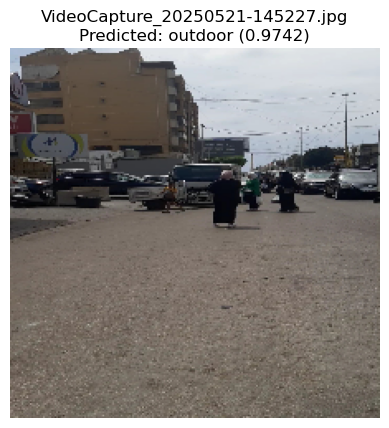

Image: VideoCapture_20250521-145227.jpg, Predicted: outdoor (0.9742)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


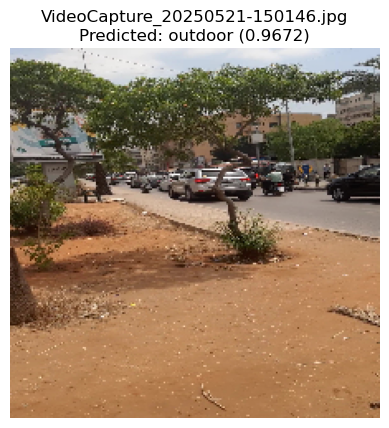

Image: VideoCapture_20250521-150146.jpg, Predicted: outdoor (0.9672)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


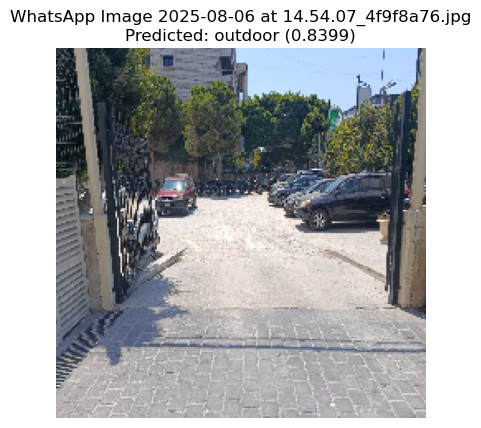

Image: WhatsApp Image 2025-08-06 at 14.54.07_4f9f8a76.jpg, Predicted: outdoor (0.8399)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


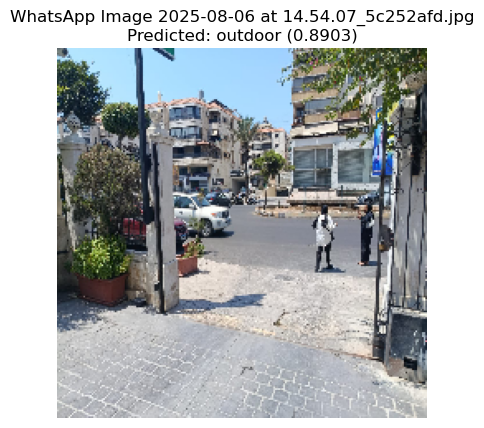

Image: WhatsApp Image 2025-08-06 at 14.54.07_5c252afd.jpg, Predicted: outdoor (0.8903)
----------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


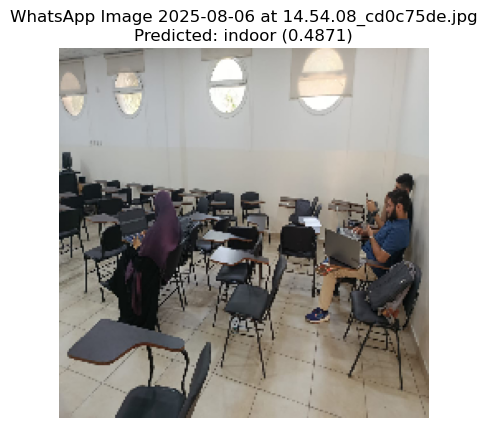

Image: WhatsApp Image 2025-08-06 at 14.54.08_cd0c75de.jpg, Predicted: indoor (0.4871)
----------------------------------------


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os

# 1. Load the trained model
model = tf.keras.models.load_model('best_model.keras')

# 2. Set image size (same as training size)
img_size = (224, 224)

# 3. Define class labels (adjust if needed)
class_names = ['indoor', 'outdoor']  # Modify if you used different labels

# 4. Directory of new images
image_dir = "test_images/"  # Change to your directory containing images

import matplotlib.pyplot as plt

# 5. Loop through images and make predictions with visualization
for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    
    # Load and preprocess image
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array_exp = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array_exp)[0][0]
    predicted_class = class_names[1] if prediction > 0.5 else class_names[0]

    # Plot image with label
    plt.imshow(img_array)
    plt.axis('off')
    plt.title(f"{img_name}\nPredicted: {predicted_class} ({prediction:.4f})")
    plt.show()
    print(f"Image: {img_name}, Predicted: {predicted_class} ({prediction:.4f})")
    print("-" * 40)
# End of script

***Indoor object detection***

<>:8: SyntaxWarning: invalid escape sequence '\W'
<>:8: SyntaxWarning: invalid escape sequence '\W'
C:\Users\Mohamad Moallem\AppData\Local\Temp\ipykernel_16588\4148501559.py:8: SyntaxWarning: invalid escape sequence '\W'
  image = cv2.imread("test_images\WhatsApp Image 2025-08-06 at 14.54.08_cd0c75de.jpg")  # Replace with your image path



0: 480x640 20 chairs, 6 tables, 1 lamp, 1 laptop, 1 person, 242.8ms
Speed: 7.6ms preprocess, 242.8ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)


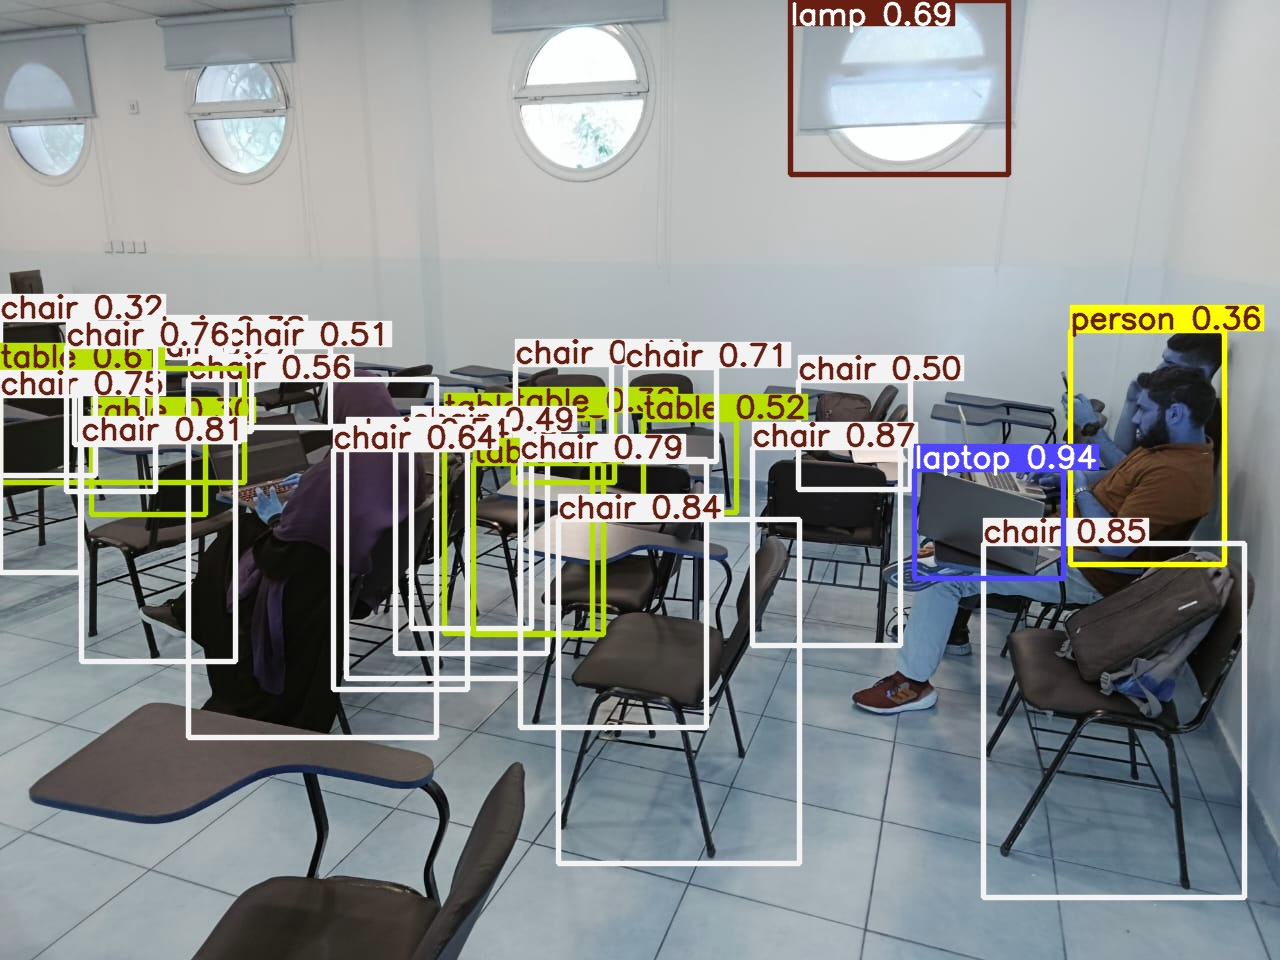

In [3]:
from ultralytics import YOLO
import cv2
from IPython.display import display, Image
import numpy as np

# Load model and image
model = YOLO("indoor_yolov8n.pt")
image = cv2.imread("test_images\WhatsApp Image 2025-08-06 at 14.54.08_cd0c75de.jpg")  # Replace with your image path

# Run inference
results = model(image)

# Annotate image (with boxes/labels)
annotated_img = results[0].plot()  # Auto-generates visualization

# Convert BGR to RGB (for proper display)
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Encode as JPEG and display
_, encoded_img = cv2.imencode('.jpg', annotated_img_rgb)
display(Image(data=encoded_img.tobytes()))

***Outdoor object detection***

<>:8: SyntaxWarning: invalid escape sequence '\V'
<>:8: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Mohamad Moallem\AppData\Local\Temp\ipykernel_16588\2654176277.py:8: SyntaxWarning: invalid escape sequence '\V'
  image = cv2.imread("test_images\VideoCapture_20250521-145227.jpg")  # Replace with your image path



0: 640x384 1 traffic sign, 4 persons, 8 cars, 240.3ms
Speed: 15.9ms preprocess, 240.3ms inference, 14.5ms postprocess per image at shape (1, 3, 640, 384)


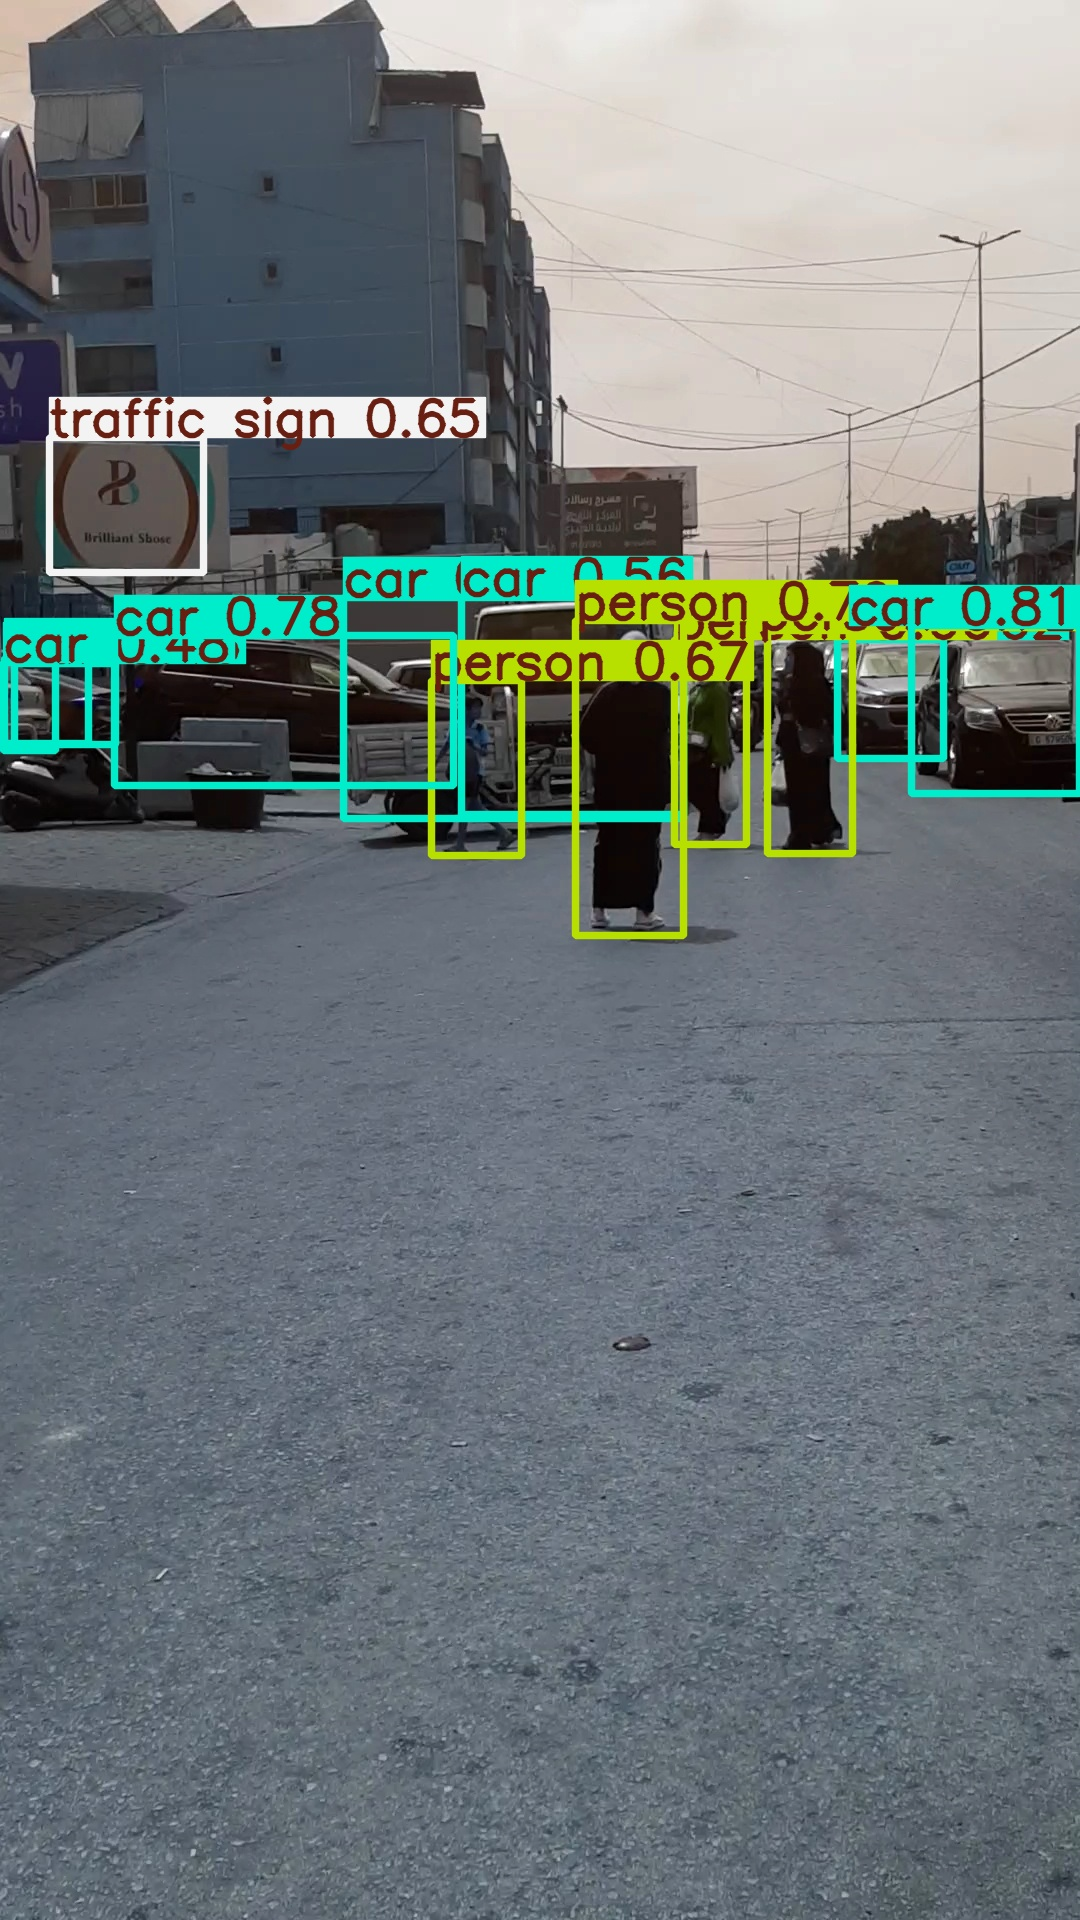

In [2]:
from ultralytics import YOLO
import cv2
from IPython.display import display, Image
import numpy as np

# Load model and image
model = YOLO("outdoor_yolov8n.pt")
image = cv2.imread("test_images\VideoCapture_20250521-145227.jpg")  # Replace with your image path

# Run inference
results = model(image)

# Annotate image (with boxes/labels)
annotated_img = results[0].plot()  # Auto-generates visualization

# Convert BGR to RGB (for proper display)
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

# Encode as JPEG and display
_, encoded_img = cv2.imencode('.jpg', annotated_img_rgb)
display(Image(data=encoded_img.tobytes()))

***Midas output example***

Using cache found in C:\Users\Mohamad Moallem/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\Mohamad Moallem/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


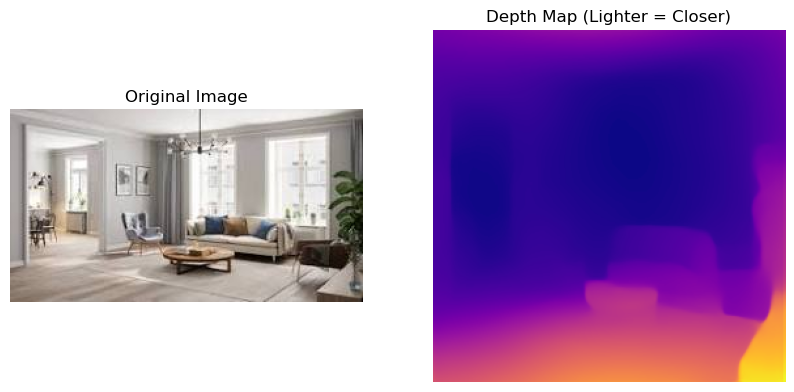

In [13]:
import cv2
import torch
import numpy as np
from matplotlib import pyplot as plt

# Load the MiDaS model
model = torch.hub.load('intel-isl/MiDaS', 'MiDaS_small', pretrained=False)  # Load from source
model.load_state_dict(torch.load('midas_v21_small_256.pt', map_location='cpu'))  # Load your trained model
model.eval()  # Set to evaluation mode

# Load and preprocess image
image_path = "test_images/downloadm.jpeg"  # Replace with your image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Resize and normalize (MiDaS expects specific input)
input_tensor = torch.from_numpy(image).permute(2, 0, 1).float()
input_tensor = torch.nn.functional.interpolate(
    input_tensor.unsqueeze(0),
    size=(256, 256),
    mode='bilinear',
    align_corners=False
)
input_tensor = input_tensor / 255.0  # Normalize to [0, 1]

# Run inference
with torch.no_grad():
    depth_prediction = model(input_tensor)

# Post-process depth map
depth_map = depth_prediction.squeeze().cpu().numpy()
depth_map = cv2.normalize(depth_map, None, 0, 1, cv2.NORM_MINMAX)  # Scale to [0, 1]

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(depth_map, cmap='plasma')  # 'plasma' colormap for depth
plt.title("Depth Map (Lighter = Closer)")
plt.axis('off')
plt.show()